# Logistic Regression #

Y-axis = Binary (Wins v. Losses) \
X-axis = Continuous (Attributes)

### Import Packages ###

In [259]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from plotly.subplots import make_subplots
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split

### Read Dataset ###

In [260]:
path = '/Users/xanderyoon/School/Fall 2023/CS 4641/Project/database.sqlite'
connection = sqlite3.connect(path)

In [261]:
tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type = 'table';", connection)
tables  

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [262]:
team_attributes = pd.read_sql("SELECT * FROM Team_Attributes", connection).dropna()
team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
13,14,614,8576,2014-09-19 00:00:00,59,Balanced,57.0,Normal,52,Mixed,...,52,Normal,Organised,38,Medium,47,Press,53,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1450,244,8394,2015-09-10 00:00:00,52,Balanced,52.0,Normal,50,Mixed,...,57,Normal,Organised,48,Medium,43,Press,49,Normal,Cover
1450,1451,112512,8027,2014-09-19 00:00:00,54,Balanced,51.0,Normal,40,Mixed,...,52,Normal,Organised,44,Medium,47,Press,52,Normal,Cover
1451,1452,112512,8027,2015-09-10 00:00:00,54,Balanced,51.0,Normal,40,Mixed,...,52,Normal,Organised,44,Medium,47,Press,52,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [263]:
player = pd.read_sql("SELECT * FROM player", connection).dropna()
player_attributes = pd.read_sql("SELECT * FROM Player_Attributes", connection).dropna()
player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


### Data Processing ###

In [264]:
match = pd.read_sql("SELECT * FROM match", connection).dropna()
match["home_team_win"] = np.where(match["home_team_goal"] - match["away_team_goal"] > 0, 1, 0)

myFeatures = ['match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_win','SJA', 'VCD', 'B365H', 'WHA']
player_generics = []
for i in range(0,12):
    player_generics.append('home_player_{num}'.format(num = i))
    player_generics.append('away_player_{num}'.format(num = i))

for feature in match.keys():
    if feature not in myFeatures and feature not in player_generics:
        match = match.drop(columns=feature)
match

,match_api_id,home_team_api_id,away_team_api_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,...,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,WHA,SJA,VCD,home_team_win
3248,1228229,9825,8472,169718.0,214685.0,35606.0,26005.0,78513.0,27277.0,24011.0,...,35443.0,25150.0,160243.0,175947.0,33468.0,1.40,8.00,9.50,4.75,0
3249,1228230,8668,10260,31465.0,24023.0,23268.0,24216.0,24846.0,24006.0,24156.0,...,40945.0,30829.0,144993.0,160713.0,113836.0,4.33,1.91,1.91,3.70,1
3250,1228231,9879,9850,30633.0,31290.0,26777.0,23780.0,24130.0,34574.0,37259.0,...,46354.0,24583.0,47194.0,32728.0,24698.0,1.80,4.50,4.50,3.75,1
3251,1228232,8456,8466,31432.0,30509.0,39027.0,33086.0,31291.0,26181.0,109058.0,...,46893.0,37234.0,24501.0,109491.0,35345.0,1.17,15.00,19.00,7.00,1
3252,1228233,10261,8586,24229.0,49571.0,24228.0,23579.0,150466.0,26163.0,38373.0,...,115681.0,30895.0,157729.0,31921.0,30348.0,2.50,2.80,2.80,3.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,1260116,8581,7878,33753.0,37597.0,127894.0,30276.0,37484.0,46836.0,111237.0,...,24099.0,103424.0,179795.0,49836.0,161291.0,2.00,3.75,3.80,3.50,1
23413,1260118,8394,8302,37623.0,12766.0,22928.0,257855.0,213695.0,102612.0,38575.0,...,49970.0,33991.0,25773.0,37474.0,75310.0,3.00,2.38,2.38,3.40,1
23414,1260121,8661,8633,37439.0,260659.0,97491.0,268039.0,291635.0,103904.0,172948.0,...,30889.0,46509.0,36378.0,30893.0,25759.0,8.00,1.36,1.33,5.25,0
23415,1260123,9910,9783,71498.0,183462.0,18673.0,192065.0,46391.0,33747.0,205034.0,...,151079.0,43294.0,33761.0,186748.0,37446.0,1.91,3.80,3.80,3.60,0


In [265]:
player_attributes = player_attributes.drop(columns=['id', 'player_fifa_api_id', 'date', 'preferred_foot'])
player_attributes = player_attributes.dropna(axis=0)
mapping = {'low': -1, 'medium': 0, 'high': 1}
player_attributes['attacking_work_rate'] = player_attributes['attacking_work_rate'].map(mapping).fillna(np.nan)
player_attributes['attacking_work_rate'] = player_attributes['attacking_work_rate'].astype(float)
player_attributes['defensive_work_rate'] = player_attributes['defensive_work_rate'].map(mapping).fillna(np.nan)
player_attributes['defensive_work_rate'] = player_attributes['defensive_work_rate'].astype(float)


In [266]:
# Define column names for home and away players
home_cols = [f'home_player_{i}' for i in range(1, 12)]
away_cols = [f'away_player_{i}' for i in range(1, 12)]

# Reformat Match to create teams
home_team = pd.melt(match, id_vars=['match_api_id', 'home_team_api_id', 'home_team_win'], value_vars=home_cols,
                   var_name='home_player_number', value_name='player_api_id')
away_team = pd.melt(match, id_vars=['match_api_id', 'away_team_api_id'], value_vars=away_cols,
                   var_name='away_player_number', value_name='player_api_id')

In [267]:
def average_data (df, match, feature):
    # Merge the player data with the team data
    merged_home = home_team.merge(df, on='player_api_id')
    merged_away = away_team.merge(df, on='player_api_id')

    # Average
    average_home = merged_home.groupby('match_api_id')[feature].sum().reset_index()
    average_away = merged_away.groupby('match_api_id')[feature].sum().reset_index()

    # Merged home and away
    average = average_home.merge(average_away, on='match_api_id')
    average = average.merge(match[['match_api_id', 'home_team_win']], on='match_api_id')

    # Rename columns
    average.rename(columns={'{feature}_x'.format(feature = feature): 'home_{feature}'.format(feature = feature), '{feature}_y'.format(feature = feature): 'away_{feature}'.format(feature = feature)}, inplace=True)

    # Difference column
    average['{feature}_difference'.format(feature=feature)]  = average['home_{feature}'.format(feature = feature)] - average['away_{feature}'.format(feature = feature)]
    match = pd.merge(match, average[['match_api_id','{feature}_difference'.format(feature=feature)]], on='match_api_id')
    return match


In [268]:
player_features = ['height', 'weight']
player_attributes_features = player_attributes.drop(columns=['player_api_id']).columns

for featureX in player_features:
    print(featureX)
    match = average_data(player, match, featureX)
for featureX in player_attributes_features:
    print(featureX)
    match = average_data(player_attributes, match, featureX)



height
weight
overall_rating
potential
attacking_work_rate
defensive_work_rate
crossing
finishing
heading_accuracy
short_passing
volleys
dribbling
curve
free_kick_accuracy
long_passing
ball_control
acceleration
sprint_speed
agility
reactions
balance
shot_power
jumping
stamina
strength
long_shots
aggression
interceptions
positioning
vision
penalties
marking
standing_tackle
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


In [269]:
for col in home_cols:
    match = match.drop(columns=col)
for col in away_cols:
    match = match.drop(columns=col)

match

,match_api_id,home_team_api_id,away_team_api_id,B365H,WHA,SJA,VCD,home_team_win,height_difference,weight_difference,...,vision_difference,penalties_difference,marking_difference,standing_tackle_difference,sliding_tackle_difference,gk_diving_difference,gk_handling_difference,gk_kicking_difference,gk_positioning_difference,gk_reflexes_difference
0,1228229,9825,8472,1.40,8.00,9.50,4.75,0,35.56,-54,...,7793.0,7291.0,3476.0,4249.0,3727.0,1162.0,414.0,612.0,228.0,1108.0
1,1228230,8668,10260,4.33,1.91,1.91,3.70,1,10.16,67,...,-6506.0,-6193.0,1273.0,-602.0,-224.0,-514.0,44.0,-146.0,246.0,76.0
2,1228231,9879,9850,1.80,4.50,4.50,3.75,1,12.70,34,...,1112.0,103.0,1373.0,329.0,664.0,680.0,346.0,1812.0,367.0,78.0
3,1228232,8456,8466,1.17,15.00,19.00,7.00,1,2.54,63,...,3008.0,4990.0,2353.0,820.0,1892.0,1049.0,1032.0,2221.0,642.0,1143.0
4,1228233,10261,8586,2.50,2.80,2.80,3.40,1,17.78,87,...,542.0,1334.0,-501.0,-375.0,-668.0,77.0,-497.0,725.0,-264.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,1260116,8581,7878,2.00,3.75,3.80,3.50,1,17.78,-1,...,3557.0,3448.0,5184.0,5068.0,4834.0,-159.0,290.0,1479.0,1213.0,238.0
1758,1260118,8394,8302,3.00,2.38,2.38,3.40,1,-20.32,-29,...,-5354.0,-5496.0,-3796.0,-3503.0,-4311.0,-30.0,74.0,-826.0,605.0,177.0
1759,1260121,8661,8633,8.00,1.36,1.33,5.25,0,-2.54,37,...,-6938.0,-5897.0,-2230.0,-2705.0,-2778.0,-183.0,-968.0,-1903.0,-583.0,-1053.0
1760,1260123,9910,9783,1.91,3.80,3.80,3.60,0,-15.24,-69,...,-194.0,-1354.0,-663.0,-351.0,-209.0,256.0,352.0,-707.0,588.0,87.0


### Logistic Regression w/ no alterations ###

In [252]:
data_X = match.drop(columns=['match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_win']).dropna()
data_Y = match['home_team_win']
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.5, random_state=16)
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Feature Selection (LASSO) ###

In our pursuit of addressing convergence issues, our initial focus centers on implementing feature selection/importance. Our hypothesis revolves around the notion that our model grapples with overfitting, driven by our intuition that multicollinearity, such as the relationship between height and weight, exists within the data. To remedy this, we meticulously considered various feature importance/selection methods, namely PCA, Ridge Regression, and LASSO. After careful deliberation, we opted for Lasso, and here's the rationale behind our decision-making process for each method.

PCA's principal function lies in dimensionality reduction, assuming the features exhibit a normal distribution of statistical independence. However, given our suspicion of significant collinearity among features, particularly evident with our dataset, we steered away from PCA. This led us to regression models, designed to curtail variance within the dataset while assigning weights to features.

Among the regression techniques, we favored LASSO (L1 regularizer) over Ridge (L2 regularizer). LASSO's propensity to potentially reduce certain features to an importance of 0, effectively removing them, aligns with our aim in identifying interrelated features. Moreover, the robustness of L1 regularization against outliers, a prevalent issue, especially within sports analytics, solidifies LASSO as the optimal choice amidst these considerations.

In [253]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=42)

# Removes the means
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LASSO regularization to select important features
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X_train_scaled, y_train)

# Select features based on non-zero coefficients from LASSO
selected_features = lasso.coef_ != 0
X_train_lasso = X_train_scaled[:, selected_features]
X_test_lasso = X_test_scaled[:, selected_features]

# Apply logistic regression on the LASSO selected features
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_lasso, y_train)

# Evaluate the model
train_accuracy = logistic_reg.score(X_train_lasso, y_train)
test_accuracy = logistic_reg.score(X_test_lasso, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6494
Test Accuracy: 0.6799


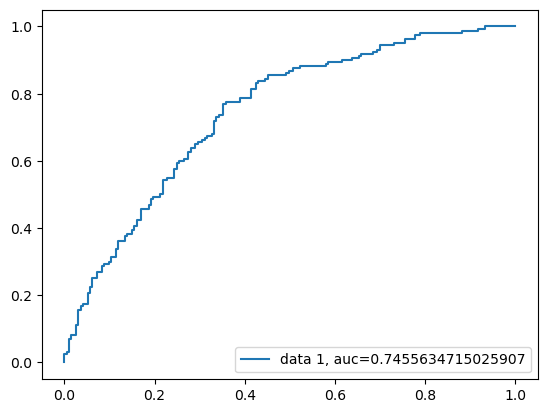

In [254]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

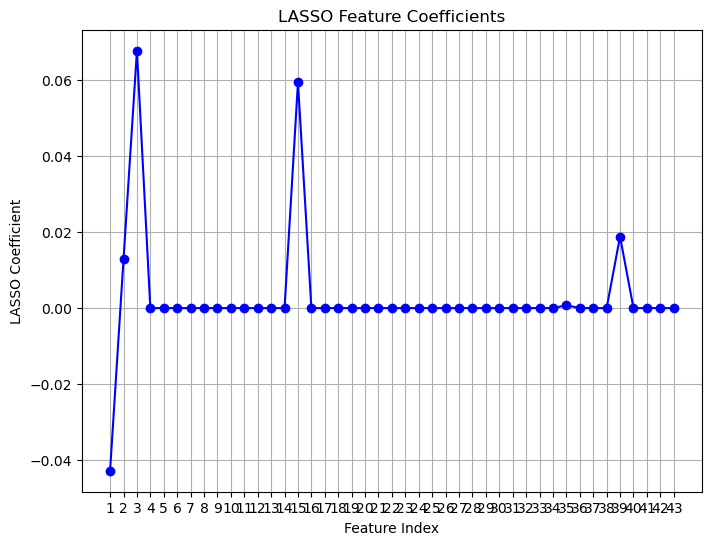

In [255]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(lasso.coef_)), lasso.coef_, marker='o', linestyle='-', color='b')
plt.xticks(range(len(lasso.coef_)), np.arange(1, len(lasso.coef_) + 1))
plt.xlabel('Feature Index')
plt.ylabel('LASSO Coefficient')
plt.title('LASSO Feature Coefficients')
plt.grid(True)
plt.show()

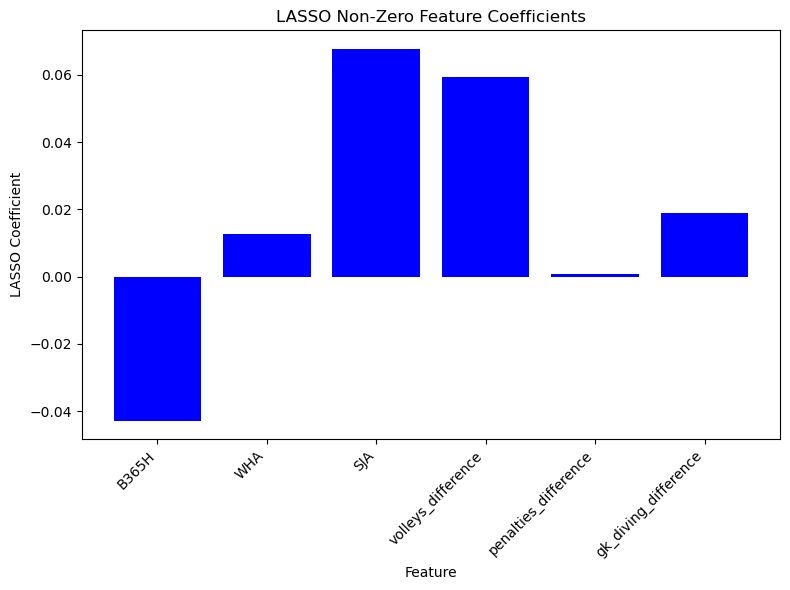

In [256]:
non_zero_indices = np.where(lasso.coef_ != 0)[0]
non_zero_coeffs = lasso.coef_[non_zero_indices]
non_zero_feature_names = [data_X.columns[i] for i in non_zero_indices]

# Plot only non-zero coefficients with their corresponding feature names
plt.figure(figsize=(8, 6))
plt.bar(non_zero_feature_names, non_zero_coeffs, color='b')
plt.xlabel('Feature')
plt.ylabel('LASSO Coefficient')
plt.title('LASSO Non-Zero Feature Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusion ###

After feature reduction, the logistic regression based solely on betting odds outperformed even the model utilizing all available features. This outcome prompts an important inquiry: why does our model display inferior performance as more features are incorporated, particularly given our use of L1 regularization across all features?

Two potential explanations have emerged. Firstly, the issue of overfitting due to inherent multicollinearity cannot be discounted. It's plausible that the metrics employed by betting companies mirror those in our model, inadvertently introducing duplicative data and features, leading to overfitting. This unexpected redundancy might undermine the model's predictive capacity.

Alternatively, the complexity and unpredictable nature of sports itself might be the culprit. Numerous immeasurable factors, such as athlete mindset, remain beyond our quantifiable scope. Betting odds, drawing from a wider range of sources and possibly encapsulating such intangible elements, might inherently possess an edge in accounting for these unquantifiable variables, enabling them to better forecast outcomes.